In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        file = csv.reader(training_file, delimiter = ",")
        images = []
        labels = []
        ignore = 1
        for row in file:
            if ignore == 1:
                ignore = 0
                continue
            labels.append(row[0])
            images.append(np.array_split(row[1:],28))
      # Your code ends here
    return np.array(images).astype("int32"), np.array(labels).astype("int32")

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = 3)# Your Code Here
testing_images = np.expand_dims(testing_images, axis = 3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    # Your Code Here
    )

validation_datagen = ImageDataGenerator(rescale = 1./255)
    # Your Code Here

# Keep These
print(training_images.shape)
print(testing_images.shape)
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
    # Your Code Here
])
from tensorflow.keras.utils import to_categorical
training_labels_binary = to_categorical(training_labels)
testing_labels_binary = to_categorical(testing_labels)

training_generator = train_datagen.flow(training_images, training_labels_binary, batch_size=64)
validation_generator = validation_datagen.flow(testing_images, testing_labels_binary, batch_size=64)

# Compile Model. 
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

# Train the Model
history = model.fit_generator(training_generator,
                    epochs = 10,
                    verbose = 1,
                   validation_data = validation_generator)

model.evaluate(validation_generator, verbose=0)

Epoch 1/10
429/429 [==============================] - 50s 117ms/step - loss: 2.9643 - acc: 0.1191 - val_loss: 2.3468 - val_acc: 0.3109
Epoch 2/10
429/429 [==============================] - 51s 118ms/step - loss: 2.5437 - acc: 0.2310 - val_loss: 1.8429 - val_acc: 0.4027
Epoch 3/10
429/429 [==============================] - 49s 113ms/step - loss: 2.2429 - acc: 0.3124 - val_loss: 1.5374 - val_acc: 0.5086
Epoch 4/10
429/429 [==============================] - 48s 111ms/step - loss: 1.9884 - acc: 0.3806 - val_loss: 1.2820 - val_acc: 0.5673
Epoch 5/10
429/429 [==============================] - 49s 114ms/step - loss: 1.8060 - acc: 0.4294 - val_loss: 1.3339 - val_acc: 0.5517
Epoch 6/10
429/429 [==============================] - 48s 111ms/step - loss: 1.6562 - acc: 0.4743 - val_loss: 1.1045 - val_acc: 0.6442
Epoch 7/10
429/429 [==============================] - 47s 110ms/step - loss: 1.5159 - acc: 0.5148 - val_loss: 0.9102 - val_acc: 0.7133
Epoch 8/10
429/429 [==============================] - 4

[0.7002810440232269, 0.7463748]

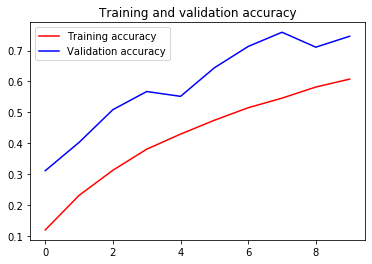

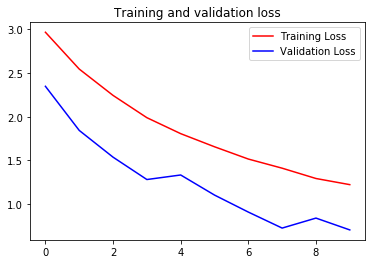

In [6]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [7]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);